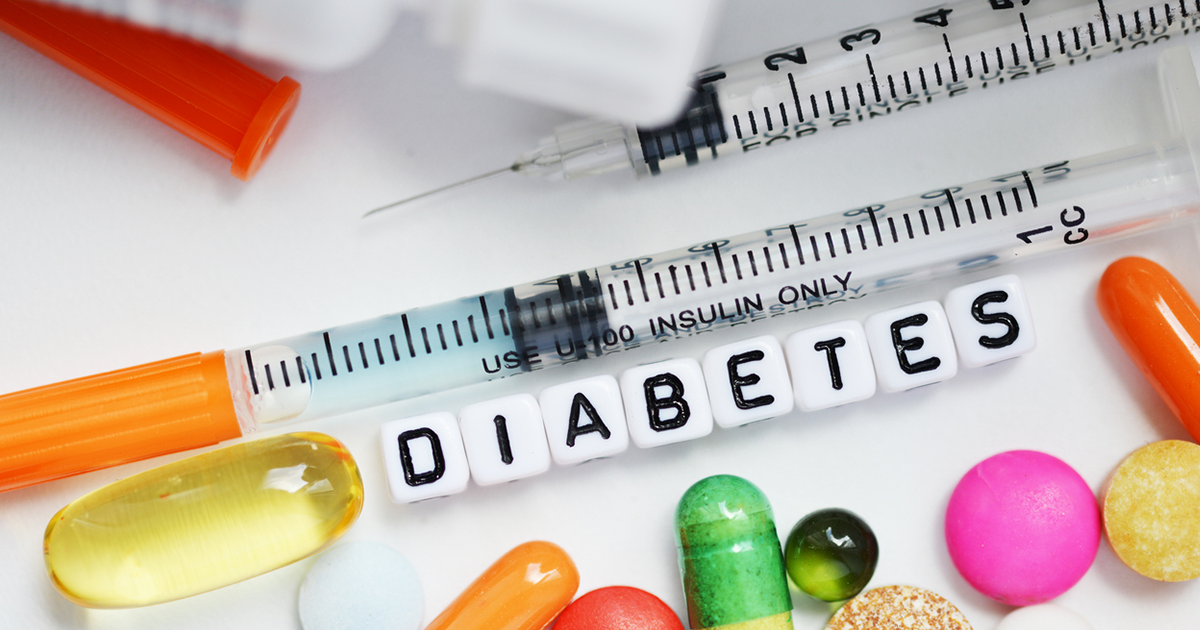

# Diabetes Prediction

### Context:
<b>1-[EDA](#eda)
<br>2- [Data Cleaning](#fix)
<br>3- [Data Visualization](#viz) 
<br>4- [Modeling ,Evaluation & Optimization](#mod)
<br>5- [Conclusion](#con)

<h3>The Pima Indian Diabetes data set consists of: </h3>

<b>Pregnancies</b>: Number of times pregnant
<br><b>Glucose</b>: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
<br><b>BloodPressure</b>: Diastolic blood pressure (mm Hg)
<br><b>SkinThickness</b>: Triceps skin fold thickness (mm)
<br><b>Insulin</b>: 2-Hour serum insulin (mu U/ml)
<br><b>BMI</b>: Body mass index (weight in kg/(height in m)^2)
<br><b>DiabetesPedigreeFunction</b>: Diabetes pedigree function
<br><b>Age</b>: Age in years
<br><b>Outcome</b>: Class variable (0 or 1) 268 of 768 are 1, the others are 0


In [600]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 KB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.4 MB/s eta 0:00:0000:0100:01
  Using cached htmlmin-0.1.12-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.7/694.7 KB 5.7 MB/s eta 0:00:0000:0100:01m
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.1.0
    Uninstalling tangled-up-in-unicode-0.1.0:
      Successfully uninstalled tangled-up-in-unicode-0.1.0
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting un

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

### Reading Data

In [4]:
data = pd.read_csv('diabetes.csv')

<a id = "eda"> </a>
### EDA

In [ ]:
profile = ProfileReport(data)
profile

In [8]:
print(f"data consists of {data.shape[0]} columns and {data.shape[1]} rows")

data consists of 768 columns and 9 rows


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data.sample(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
462,8,74,70,40,49,35.3,0.705,39,0
527,3,116,74,15,105,26.3,0.107,24,0
737,8,65,72,23,0,32.0,0.600,42,0
34,10,122,78,31,0,27.6,0.512,45,0
165,6,104,74,18,156,29.9,0.722,41,1
712,10,129,62,36,0,41.2,0.441,38,1
705,6,80,80,36,0,39.8,0.177,28,0


In [15]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [142]:
data["Outcome"].value_counts()
# Outcome is not balanced

0    500
1    268
Name: Outcome, dtype: int64

In [143]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Some Values cannot be zero, e.g. skin thickness cannot be 0 mm !
#### Therefore we will consider them as nulls and fix these values using the appropriate method

In [68]:
bp_val = data["BloodPressure"].isin([0]).sum() / len(data) *100
gl_val = data["Glucose"].isin([0]).sum() / len(data) *100
skn_val = data["SkinThickness"].isin([0]).sum() / len(data) *100
ins_val = data["Insulin"].isin([0]).sum() / len(data) *100
bmi_val = data["BMI"].isin([0]).sum() / len(data) *100

print(f"Percentage of Nulls in Blood Pressure Column: {round(bp_val,2)}%")
print(f"Percentage of Nulls in Glucose Column: {round(gl_val,2)}%")
print(f"Percentage of Nulls in SkinThickness Column: {round(skn_val,2)}%")
print(f"Percentage of Nulls in Insulin Column: {round(ins_val,2)}%")
print(f"Percentage of Nulls in BMI Column: {round(bmi_val,2)}%")

Percentage of Nulls in Blood Pressure Column: 4.56%
Percentage of Nulls in Glucose Column: 0.65%
Percentage of Nulls in Skin Thickness Column: 29.56%
Percentage of Nulls in Insulin Column: 48.7%
Percentage of Nulls in BMI Column: 1.43%


#### Big Percentage in Insulin and Skin Thickness (may be dropped later)

<a id = "fix"> </a>
### Data Cleaning

In [144]:
def fix_nulls(col):
    data[data[col].isin([0])][col]
    val = data[col].median()
    data[col] = data[col].replace(0,val)

In [112]:
bad_cols = ["Insulin", "BMI","SkinThickness", "Glucose","BloodPressure"]
for col in bad_cols:
    fix_nulls(col)
print("Fixed!")

Fixed!


In [1000]:
data.describe().T
# Fixed

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


<a id = "viz"> </a>
### Data Visualization

In [959]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale = 1.3)

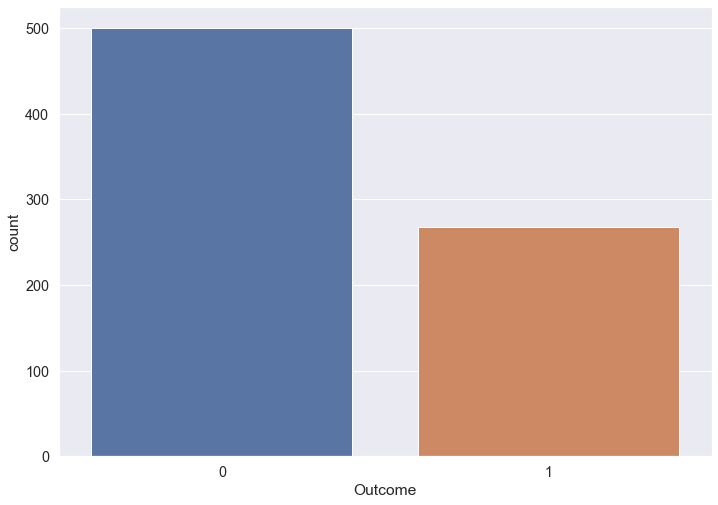

In [960]:
sns.countplot(data["Outcome"]);
# plt.hist(data["Outcome"]);
# Not Balanced as mentioned above

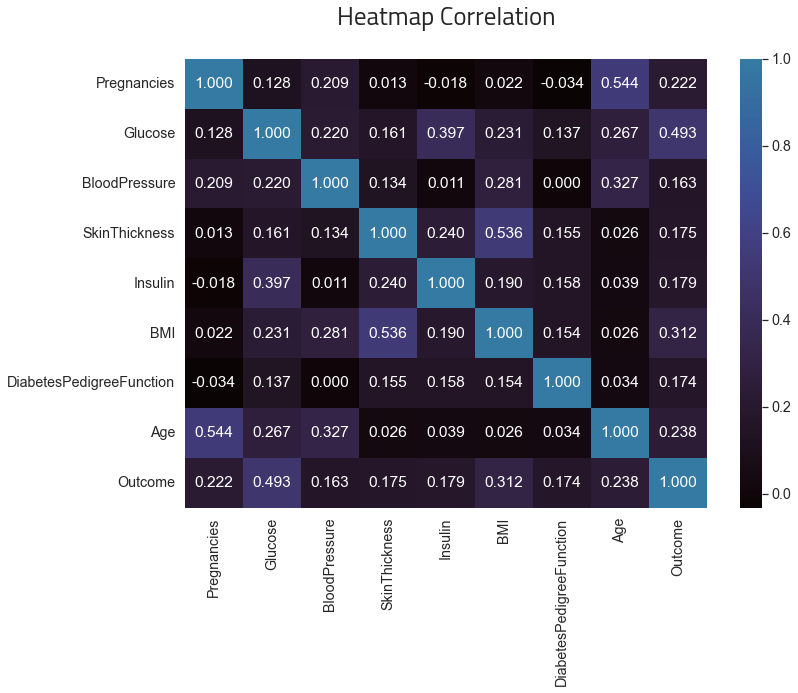

In [999]:
# Correlation Heatmap
sns.heatmap(data.corr(), annot = True, fmt = ".3f", center = True, cmap = "mako");
plt.title("Heatmap Correlation\n",fontdict={"family":"Cairo", "fontsize":25});


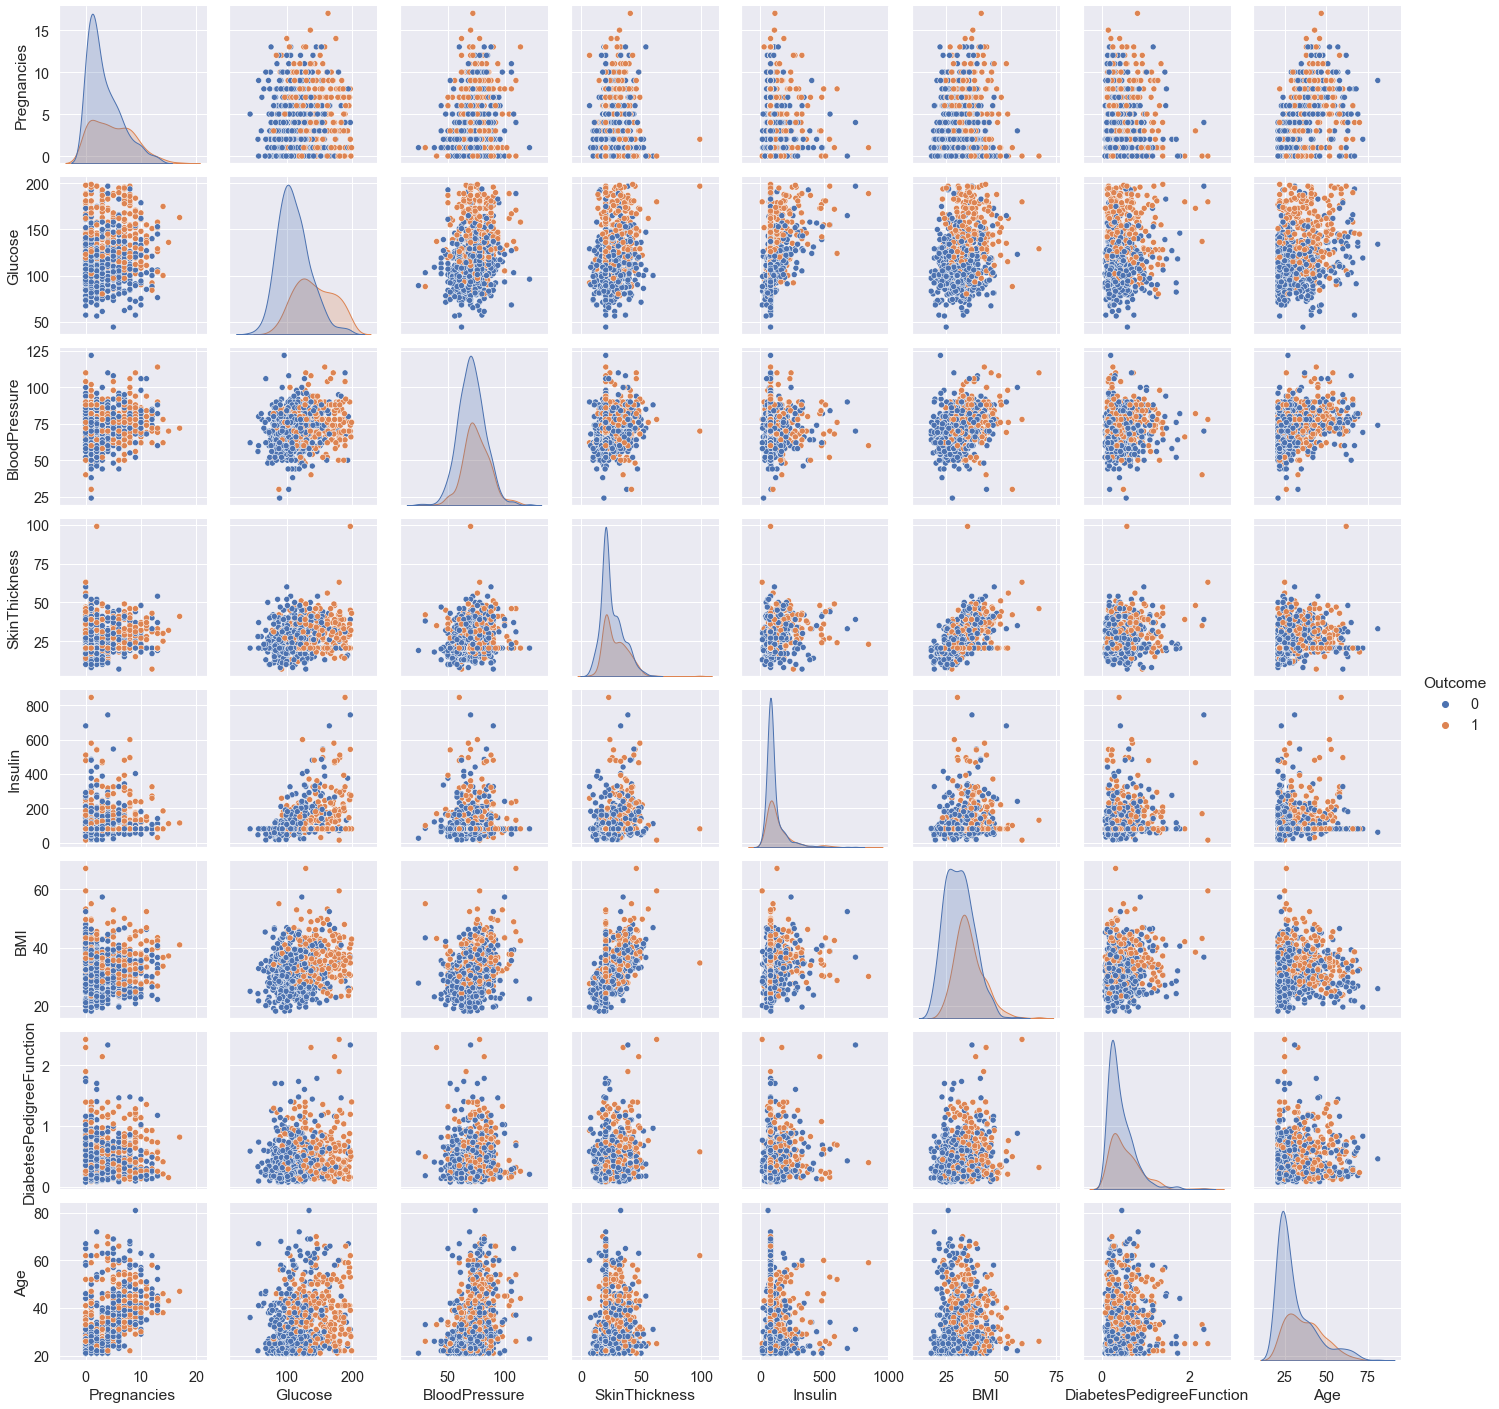

In [962]:
# Pairplot with outcome mapping
sns.pairplot(data,diag_kind = "kde",hue = "Outcome");

<a id = "mod"> </a>
### Data Modeling

In [817]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc,confusion_matrix, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [164]:
temp = data
# In case any problem happened later

In [170]:
y = data["Outcome"]
x = data.drop(["Outcome"], axis = 1)

In [200]:
scaler = StandardScaler()

In [204]:
X = scaler.fit_transform(x)
X

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [756]:
x_train, x_test,y_train,y_test = tts(X,y, test_size=0.25,stratify=y)

In [757]:
model = LogisticRegression()

In [758]:
x_train.shape

(576, 8)

In [759]:
x_test.shape

(192, 8)

In [760]:
model.fit(x_train,y_train)

LogisticRegression()

In [811]:
train_score = acc(model.predict(x_train),y_train)
print(f"Train score: {train_score*100}%")

Train score: 75.0%


In [808]:
print(classification_report(model.predict(x_train),y_train))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       337
           1       0.74      0.62      0.67       239

    accuracy                           0.75       576
   macro avg       0.75      0.73      0.74       576
weighted avg       0.75      0.75      0.75       576



In [761]:
y_pred = model.predict(x_test)

<b> Train

In [1001]:
print(classification_report(model.predict(x_train),y_train))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       337
           1       0.74      0.62      0.67       239

    accuracy                           0.75       576
   macro avg       0.75      0.73      0.74       576
weighted avg       0.75      0.75      0.75       576



<b> Test

In [764]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       145
           1       0.57      0.81      0.67        47

    accuracy                           0.80       192
   macro avg       0.75      0.80      0.76       192
weighted avg       0.84      0.80      0.81       192



#### Bad F1 Score for class 1, which is actually predicted because of the unbalanced outcome
#### Time for Oversampling

## Optimization

### Smote Oversampling

In [765]:
x_new,y_new = SMOTE().fit_resample(X,y)

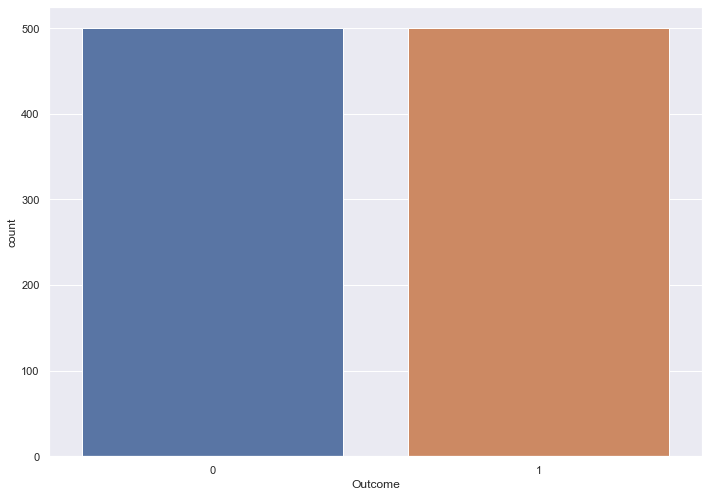

In [949]:
sns.countplot(y_new);

In [784]:
x_train_new,x_test_new,y_train_new,y_test_new = tts(x_new,y_new, test_size=0.25,stratify=y_new)

In [785]:
x_train_new.shape

(750, 8)

In [786]:
x_test_new.shape

(250, 8)

In [787]:
new_model = LogisticRegression()

In [788]:
new_model.fit(x_train_new, y_train_new)

LogisticRegression()

In [812]:
train_score_smote = acc(model.predict(x_train_new),y_train_new)
print(f"Train score: {train_score_smote*100}%")

Train score: 74.26666666666667%


In [789]:
y_new_pred = model.predict(x_test_new)

In [790]:
print(classification_report(y_new_pred,y_test_new))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       166
           1       0.52      0.77      0.62        84

    accuracy                           0.68       250
   macro avg       0.68      0.71      0.68       250
weighted avg       0.74      0.68      0.69       250



### RandomOverSampler

In [791]:
ros = RandomOverSampler(random_state=8)

In [792]:
x_ros,y_ros = ros.fit_resample(X,y)

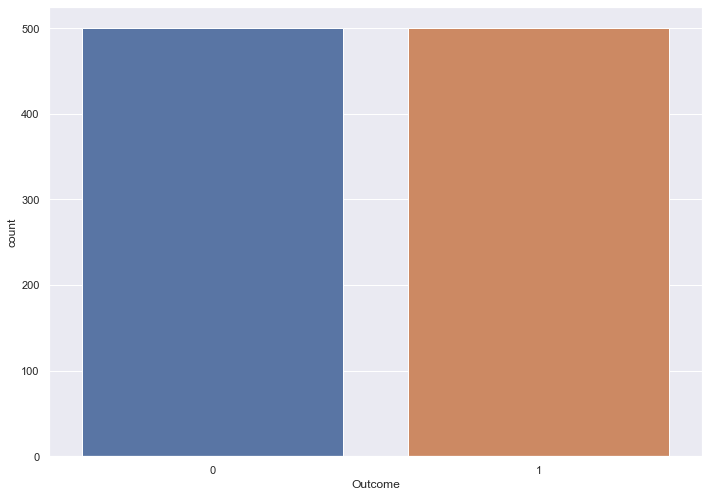

In [948]:
sns.countplot(y_ros);

In [794]:
best_acc = 0
best_seed = 0
for i in range(0,101):
    x_train_ros,x_test_ros,y_train_ros,y_test_ros = tts(x_ros,y_ros, test_size=0.25,random_state=i)
    model.fit(x_train_ros,y_train_ros)
    y_pred_ros = model.predict(x_test_ros)
    score = acc(y_pred_ros,y_test_ros)
    if (score > best_acc):
        best_acc = score
        best_seed = i

In [796]:
print(f"Best Accuracy is {best_acc*100}%, with seed equal to {best_seed}")

Best Accuracy is 81.6%, with seed equal to 34


In [797]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros = tts(x_ros,y_ros, test_size=0.25,random_state=34)
model.fit(x_train_ros,y_train_ros)
y_pred_ros = model.predict(x_test_ros)

<b>Train

In [1004]:
print(classification_report(model.predict(x_train_ros), y_train_ros))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       395
           1       0.70      0.74      0.72       355

    accuracy                           0.73       750
   macro avg       0.73      0.73      0.73       750
weighted avg       0.73      0.73      0.73       750



<b>Test

In [1005]:
print(classification_report(y_pred_ros, y_test_ros))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       131
           1       0.80      0.82      0.81       119

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



#### Better F1 Score for both classes

## SVM Classifier

### Without Oversampling

In [941]:
sv_model = SVC(kernel = 'rbf')

In [942]:
sv_model.fit(x_train,y_train)

SVC()

<b>Train

In [943]:
print(classification_report(sv_model.predict(x_train),y_train))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       417
           1       0.65      0.82      0.72       159

    accuracy                           0.83       576
   macro avg       0.78      0.82      0.80       576
weighted avg       0.85      0.83      0.83       576



<b> Test

In [944]:
print(classification_report(sv_model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       142
           1       0.54      0.72      0.62        50

    accuracy                           0.77       192
   macro avg       0.71      0.75      0.72       192
weighted avg       0.80      0.77      0.78       192



### With Oversampling

In [987]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros = tts(x_ros,y_ros, test_size=0.25,random_state=34)

In [988]:
sv_model.fit(x_train_ros,y_train_ros)

SVC()

<b> Train

In [989]:
print(classification_report(sv_model.predict(x_train_ros),y_train_ros))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       362
           1       0.83      0.80      0.82       388

    accuracy                           0.81       750
   macro avg       0.81      0.81      0.81       750
weighted avg       0.81      0.81      0.81       750



In [990]:
sv_y_pred_ros = sv_model.predict(x_test_ros)

<b> Test

In [991]:
print(classification_report(sv_y_pred_ros,y_test_ros))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       118
           1       0.88      0.82      0.85       132

    accuracy                           0.84       250
   macro avg       0.84      0.85      0.84       250
weighted avg       0.85      0.84      0.84       250



<a id = "con"> </a>
## Conclusion

After exploring the data and fixing issues related to it, I tried first modeling with the unbalanced outcome using Logistic Regression, the result was not too bad, then tried again Logistic Regression with Smote Oversampling, result was worse, and it didn't worth it to try to optimize more, so I decided to use another method for oversampling which is the RandomOverSampling, the result with Logistic Regression was quite better, then tried SVM, result was much better.
Therefore I concluded that the best model to use is the SVM with oversampling (which goes with the theory that SVM with oversampling is the best choice for small data).